Try out a VAE which uses a mixture of continuous and discrete latent variables on the Photon PAC data.

- Keras Code from 
https://github.com/EmilienDupont/vae-concrete

**TODO**

 - [X] ~~Data loader for PAC~~
 - [X] ~~Decide on mono vs 3 channel~~
 - [X] Report loss components separately
 - [X] Save fitted model
 - [X] Visualize fitted model (how many latent dimensions used? any predictive power?)
 - [X] Semi-supervised: Add discriminative loss following https://arxiv.org/pdf/1611.01144.pdf
 - [X] Add covariables

In [1]:
1

1

In [1]:
import pac_ss
import concrete_util

/data/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import importlib
importlib.reload(concrete_util)
importlib.reload(pac_ss)

<module 'pac_ss' from '/data/code/deep-embedding/concrete/pac_ss.py'>

In [3]:
from concrete_util import get_processed_pac


(x_train, y_train, w_train), (x_test, y_test, w_test) = \
get_processed_pac(batch_size=25, 
split_frac=0.99)


In [4]:
model = pac_ss.SSVAE(extra_shape=w_train.shape[1], latent_cont_dim=3, latent_disc_dim=2)


In [ ]:
model.fit(x_train, w_train, y_train,
          batch_size=25, num_epochs=10, val_split=0.0854)
#model.plot(std_dev=1.)

Setting up model...
Completed model setup.
Instructions for updating:
Use the retry module or similar alternatives.
Train on 1600 samples, validate on 150 samples
Epoch 1/10
1600/1600 [==============================] - 18s 11ms/step - loss: 5208.6164 - generated_loss: 4085.5145 - alpha_loss: -0.8214 - probs_loss: 1.1635 - z_enc_loss: 1112.2878 - probs_categorical_accuracy: 0.5319 - val_loss: 3355.0149 - val_generated_loss: 3341.6392 - val_alpha_loss: -0.9827 - val_probs_loss: 0.6871 - val_z_enc_loss: 7.4876 - val_probs_categorical_accuracy: 0.5533
Epoch 2/10
1600/1600 [==============================] - 15s 9ms/step - loss: 3267.5832 - generated_loss: 3253.0720 - alpha_loss: -0.9647 - probs_loss: 0.7300 - z_enc_loss: 8.1763 - probs_categorical_accuracy: 0.5719 - val_loss: 4085.5051 - val_generated_loss: 4079.3912 - val_alpha_loss: -0.9983 - val_probs_loss: 0.6955 - val_z_enc_loss: 0.1576 - val_probs_categorical_accuracy: 0.4467
Epoch 3/10
1600/1600 [==============================] - 15s

In [7]:
model.model.save('pacss_3c_2d_10e_discrim10x.h5')

total 1828744
-rw-rw-r-- 1 ubuntu ubuntu   1173336 May  5 10:19 covariates.h5
-rw-rw-r-- 1 ubuntu ubuntu 134695025 May  7 15:40 imageslices.h5
-rw-rw-r-- 1 ubuntu ubuntu      7731 May  7 16:02 pac_concrete.py
-rw-rw-r-- 1 ubuntu ubuntu      5934 May  7 16:43 labels.h5
-rw-rw-r-- 1 ubuntu ubuntu 578766096 May  7 16:48 pac_3c_5d.h5
-rw-rw-r-- 1 ubuntu ubuntu      8000 May  7 16:51 PAC Concrete.ipynb
-rw-rw-r-- 1 ubuntu ubuntu      7731 May 12 08:33 pac_ss.py~
-rw-rw-r-- 1 ubuntu ubuntu      6520 May 12 09:03 concrete_util.py
-rw-rw-r-- 1 ubuntu ubuntu        72 May 12 09:30 Untitled.ipynb
-rw-rw-r-- 1 ubuntu ubuntu      8819 May 12 09:33 PAC Concrete - Plot.ipynb
-rw-rw-r-- 1 ubuntu ubuntu     10766 May 12 10:47 pac_ss.py
drwxrwxr-x 2 ubuntu ubuntu      4096 May 12 10:47 __pycache__
-rw-rw-r-- 1 ubuntu ubuntu 578914328 May 12 10:49 pacss_3c_2d.h5
-rw-rw-r-- 1 ubuntu ubuntu     71584 May 12 10:59 PAC Semi-Sup Concrete.ipynb
-rw-rw-r-- 1 ubuntu ubuntu 578914336 May 12 11:25 pacss_3c_2d_100

# Are we using the latent dimensions?

We can plot the KL from the prior to the encoding for each training point.

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [9]:
model = pac_ss.SSVAE(extra_shape=w_train.shape[1], latent_cont_dim=3, latent_disc_dim=2)
model.batch_size = 25
model._set_model()
model.model.load_weights("pacss_3c_2d_10e_discrim10x.h5")

Setting up model...
Completed model setup.


In [10]:
x_train.shape

(1750, 121, 145, 3)

In [11]:
gen, alpha, probs, z_enc = model.model.predict([x_train,w_train], batch_size=model.batch_size)

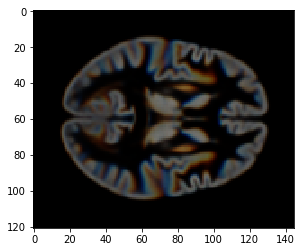

In [12]:
plt.imshow(gen[0])

In [13]:
probs[0]

array([0.8175977 , 0.18240231], dtype=float32)

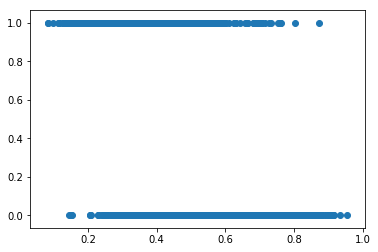

In [14]:
plt.scatter(probs[:,1], w_train[:,2]) # prob of label vs site=1

(array([ 1.,  1.,  7.,  3., 14., 14., 19., 23., 29., 26., 22., 34., 32.,
        35., 42., 43., 35., 30., 42., 36., 35., 50., 51., 34., 42., 47.,
        43., 43., 51., 44., 40., 59., 41., 46., 47., 55., 77., 47., 54.,
        53., 71., 52., 49., 34., 43., 27., 15.,  6.,  3.,  3.]),
 array([0.04799527, 0.06533066, 0.08266606, 0.10000145, 0.11733685,
        0.13467224, 0.15200764, 0.16934303, 0.18667843, 0.20401382,
        0.22134922, 0.23868461, 0.25602   , 0.2733554 , 0.29069079,
        0.30802619, 0.32536158, 0.34269698, 0.36003237, 0.37736777,
        0.39470316, 0.41203856, 0.42937395, 0.44670935, 0.46404474,
        0.48138013, 0.49871553, 0.51605092, 0.53338632, 0.55072171,
        0.56805711, 0.5853925 , 0.6027279 , 0.62006329, 0.63739869,
        0.65473408, 0.67206948, 0.68940487, 0.70674026, 0.72407566,
        0.74141105, 0.75874645, 0.77608184, 0.79341724, 0.81075263,
        0.82808803, 0.84542342, 0.86275882, 0.88009421, 0.89742961,
        0.914765  ]),
 <a list of 50

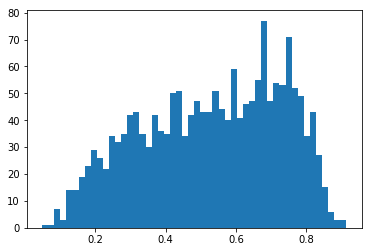

In [15]:
plt.hist(probs[:,0],bins=50)

In [16]:
z_enc[:,3:].mean(axis=0)

array([-0.22920471, -0.2962792 , -0.10080503], dtype=float32)

## Interactive plotting of generated output

In [18]:
model.batch_size = 1
model._set_model()
model.model.load_weights("pacss_3c_2d_10e_discrim10x.h5")

Setting up model...
Completed model setup.


In [19]:
model.model.inputs

[<tf.Tensor 'input_10:0' shape=(1, 121, 145, 3) dtype=float32>,
 <tf.Tensor 'input_11:0' shape=(1, 7) dtype=float32>]

In [20]:
[(i,model.model.layers[i].name) for i in range(len(model.model.layers))]

[(0, 'input_10'),
 (1, 'conv2d_13'),
 (2, 'conv2d_14'),
 (3, 'conv2d_15'),
 (4, 'conv2d_16'),
 (5, 'input_11'),
 (6, 'flatten_4'),
 (7, 'dense_13'),
 (8, 'concatenate_13'),
 (9, 'dense_14'),
 (10, 'z_mean'),
 (11, 'z_log_var'),
 (12, 'alpha'),
 (13, 'lambda_7'),
 (14, 'lambda_8'),
 (15, 'concatenate_14'),
 (16, 'concatenate_15'),
 (17, 'dense_15'),
 (18, 'dense_16'),
 (19, 'reshape_4'),
 (20, 'conv2d_transpose_10'),
 (21, 'conv2d_transpose_11'),
 (22, 'conv2d_transpose_12'),
 (23, 'generated'),
 (24, 'probs'),
 (25, 'z_enc')]

In [21]:


from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [22]:
import keras.backend as K

In [23]:
w_train[0]

array([-0.9088289,  0.2943839,  1.       ,  0.       ,  0.       ,
        1.       ,  0.       ], dtype=float32)

In [26]:

def gen(c1,c2,c3,disc, site):
    num_c = 3
    num_disc = 2
    z = np.zeros(num_c + num_disc)
    z[disc+num_c] = 1
    z[:num_c] = [c1,c2,c3]
    w = w_train[0]
    w[2:5] = 0
    w[site] = 1
    X = model.generate(np.r_[z], np.r_[w])[0]
    #im.set_data(X)
    plt.imshow(X)

    
interact(gen, c1=(-5.,5.), c2=(-5.,5.), c3=(-5.,5.), disc=range(2), site=range(3))

interactive(children=(FloatSlider(value=0.0, description='c1', max=5.0, min=-5.0), FloatSlider(value=0.0, desc…

<function __main__.gen(c1, c2, c3, disc, site)>

In [85]:
z_mean = model.model.get_layer(name='z_mean')
alpha = model.model.get_layer(name='alpha')

In [88]:
model.model.inputs

[<tf.Tensor 'input_28:0' shape=(25, 121, 145, 3) dtype=float32>,
 <tf.Tensor 'input_29:0' shape=(25, 7) dtype=float32>]

In [90]:
# How does the encoding look?
enc = K.function(model.model.input_layers,[z_mean,alpha])
def encode(X):
    z_mean, alpha = enc([X[np.newaxis,:]])
    return alpha
    return np.argmax(alpha)

np.vstack(map(encode, x_train[1000:1100]))[:,4]

TypeError: Can not convert a Dense into a Tensor or Operation.

In [ ]:
import keras.backend as K

In [ ]:
1